<center><h1> Assignment 1 </center>

<center><h2> Benedek Dankó </center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**1.**

In [2]:
df = pd.read_csv("../data/titanic.csv") # read csv file

In [7]:
df.describe() # short summary of the data frame

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isna().sum() # check number of missing values per variable

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

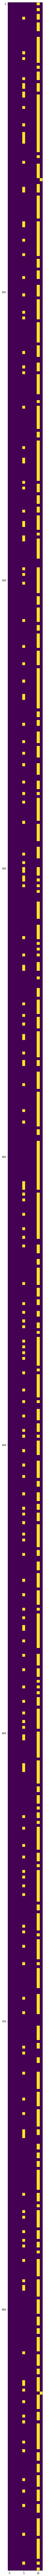

In [45]:
plt.figure(figsize=(25, 200))
plt.imshow(df.isna()) # visualize nan values per variable
plt.show()

Column 10 with many yellow squares (nan values): Cabin variable. <br>
Additionally, variable Age has also many nan values (177).

Replace Cabin, Embarked nan values with 0s:

In [70]:
df["Cabin"] = df["Cabin"].fillna(0) # replace nan Cabin values with 0s
df["Embarked"] = df["Embarked"].fillna(0) # replace nan Embarked values with 0s

In [72]:
df.Cabin.head()

0       0
1     C85
2       0
3    C123
4       0
Name: Cabin, dtype: object

In [74]:
set(df.Embarked)

{0, 'C', 'Q', 'S'}

In [59]:
len(df["Age"][df["Age"].isna() == True])/len(df["Age"]) # proportion of Age values with NaNs = 19.9%

0.19865319865319866

Replace Age nan values with the mean of its values:

In [63]:
df["Age"] = df["Age"].fillna(df["Age"].mean()) # replace nan values in Age column with mean values

**2.** 

Count number of persons died/survived in each Pclass:

In [8]:
df_heatmap = df[['PassengerId', 'Survived', 'Pclass']].groupby(['Pclass', 'Survived']).agg(['count']).reset_index()

In [9]:
df_heatmap.columns = ["Pclass", "Survived", "Count"] # rename columns

Format data:

In [10]:
df_died = df_heatmap[df_heatmap["Survived"] == 0][["Pclass", "Count"]].set_index("Pclass")
df_died.columns = ["Died"]

df_survived = df_heatmap[df_heatmap["Survived"] == 1][["Pclass", "Count"]].set_index("Pclass")
df_survived.columns = ["Survived"]

Joint table, in the required format:

In [11]:
df_heatmap = pd.concat([df_died, df_survived], axis=1)
df_heatmap

,Died,Survived
Pclass,,
1,80,136
2,97,87
3,372,119


Create heatmap:

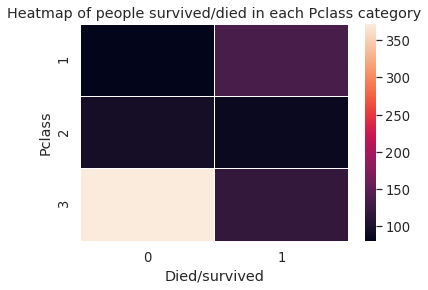

In [25]:
ax = sns.heatmap(df_heatmap.to_numpy(), linewidth=0.3)
plt.title("Heatmap of people survived/died in each Pclass category")
plt.xlabel("Died/survived")
plt.ylabel("Pclass")
ax.set(yticklabels=list(df_heatmap.index))
plt.show()

X axis: 0 or 1 (dead, alive) <br>
Y axis: Pclass variable (1/2/3) <br>
Color: number of persons in that category

**3.**

Boxplot of Age variable in different Pclass categories:

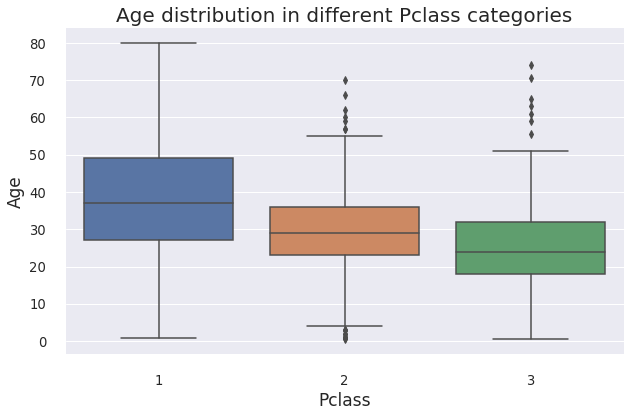

In [6]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="Pclass", y="Age",
            data=df)
sns.despine(offset=10, trim=True)
ax.axes.set_title("Age distribution in different Pclass categories",fontsize=20)
ax.set_xlabel("Pclass",fontsize=17)
ax.set_ylabel("Age",fontsize=17)
plt.show()

**4.**

Correlation matrix of all variables:

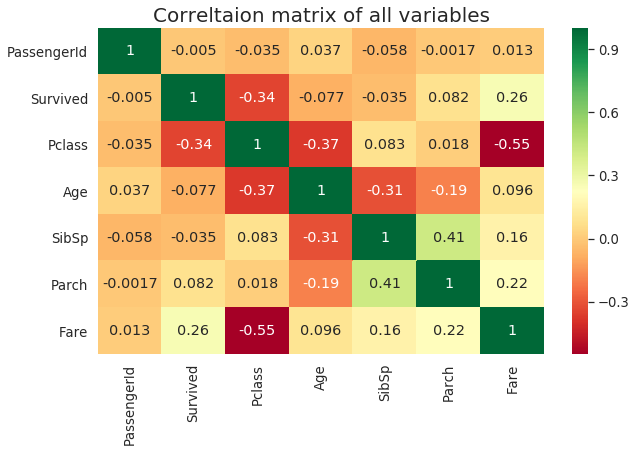

In [5]:
# original code from here: https://www.kaggle.com/timbaney1989/titanic-correlation-map-and-machine-learning

f, ax = plt.subplots(figsize=(10, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
ax.axes.set_title("Correltaion matrix of all variables",fontsize=20)
plt.show()

Interestingly, Pclass variable influenced the most that people survived/died. There's a negative correlation between these variables, however, Survived coded as '0-1', so it is a binary variable. <br>
After Pclass, Fare variable also influenced survival chances, the higher the fare, the higher the possibility that a giver person survived.

**5.**

**a)**

Scatterplot, describing relationship between 4 variables:

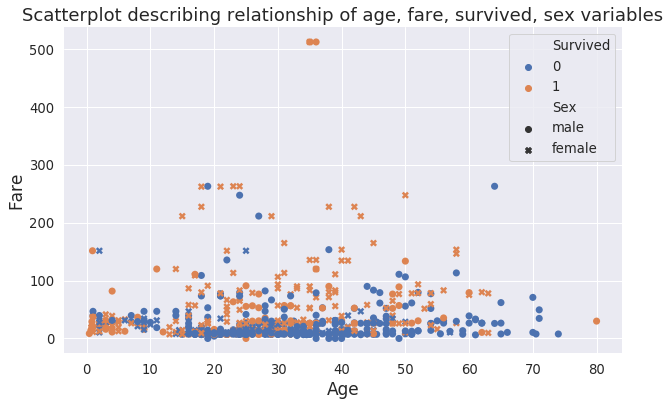

In [26]:
f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Age", y="Fare",
                hue="Survived",style="Sex",
                sizes=(3, 12), linewidth=0,
                data=df, ax=ax, s=50)
ax.axes.set_title("Scatterplot describing relationship of age, fare, survived, sex variables",fontsize=18)
ax.set_xlabel("Age",fontsize=17)
ax.set_ylabel("Fare",fontsize=17)
plt.show()

As you may see, most of the people who died (blue) had lower fare. <br>
Furthermore, most of the little children survived (age 0-5). Over the age of 60, most people could not survive.

**b)**

Barplot describing the survival distribution of different age categories:

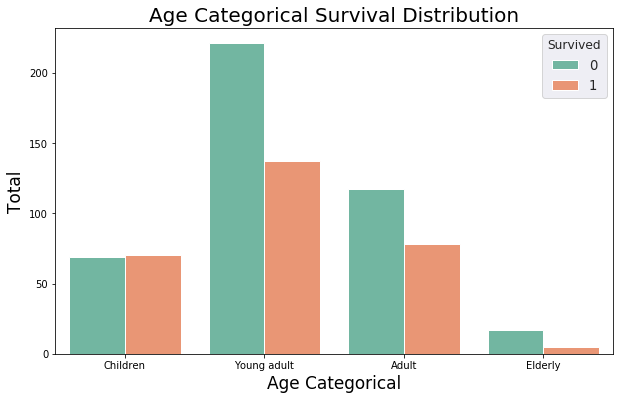

In [3]:
# original code/idea from here: https://www.kaggle.com/thulani96/titanic-dataset-analysis-with-seaborn

f, ax = plt.subplots(figsize=(10, 6))
sns.set(font_scale = 1.2)
interval = (0,18,35,60,120)
categories = ['Children','Young adult','Adult', 'Elderly']
df['Age_cats'] = pd.cut(df.Age, interval, labels = categories)

ax = sns.countplot(x = 'Age_cats',  data = df, hue = 'Survived', palette = 'Set2')
ax.axes.set_title("Age Categorical Survival Distribution",fontsize=20)
ax.set_xlabel("Age Categorical",fontsize=17)
ax.set_ylabel("Total",fontsize=17)

plt.show()

Interestingly, higher fraction of the people in the categories young adult, adult and elderly died, maybe they were more altruist to save other people, like the children. <br>